# importing libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset

In [7]:
data = pd.read_csv("/Users/muykhorng/Documents/GitHub/Introduction-to-Data-Science/diabetes.csv")

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [10]:
data.shape

(768, 9)

# Access the first row 

In [11]:
data.iloc[0]

Pregnancies                   6.000
Glucose                     148.000
BloodPressure                72.000
SkinThickness                35.000
Insulin                       0.000
BMI                          33.600
DiabetesPedigreeFunction      0.627
Age                          50.000
Outcome                       1.000
Name: 0, dtype: float64


# Check for missing values
 count the number of N/A in data set for each variables

In [12]:
data.isna().sum() 
# Check for the number of zeros in each column
#zero_counts = (data == 0).sum()

# Display results
#print("Number of zero values in each column:")
#print(zero_counts)


#panha, please check here, the file path i change didn't correctly done, therefore when we check it's still the old csv file data?!?


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Check datatype of each column

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Descriptive statistics for each column 

In [14]:
# Get summary statistics
summary = data.describe()

# Calculate mode
modes = data.mode().iloc[0]  # Get the first mode for each column

# Display describe() and mode
print("Summary Statistics:\n", summary)
print("\nMode for Each Column:\n", modes)


Summary Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000

# Checking for data imbalance

In [15]:
data['Outcome'].value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

### In term as probability (percentage)

In [16]:
data['Outcome'].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

### Outcome values Visualizing 

/var/folders/4m/t0m7_q_9465_5kz9p3cbrwsc0000gn/T/ipykernel_4758/3709795234.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=data, palette = 'pastel')


<Axes: xlabel='Outcome', ylabel='count'>

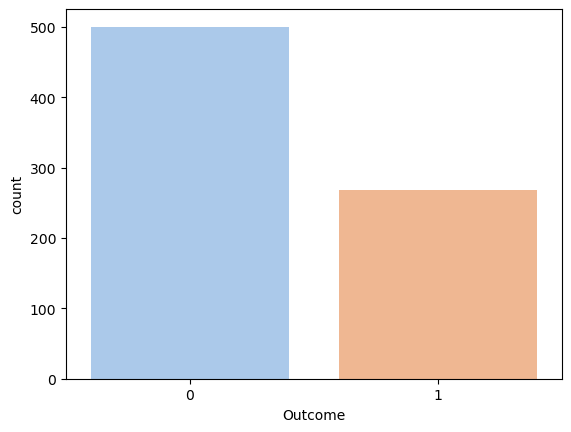

In [17]:
sns.countplot(x='Outcome', data=data, palette = 'pastel')

# Variable explorations + identifying shape & outliers

### Pregnancies

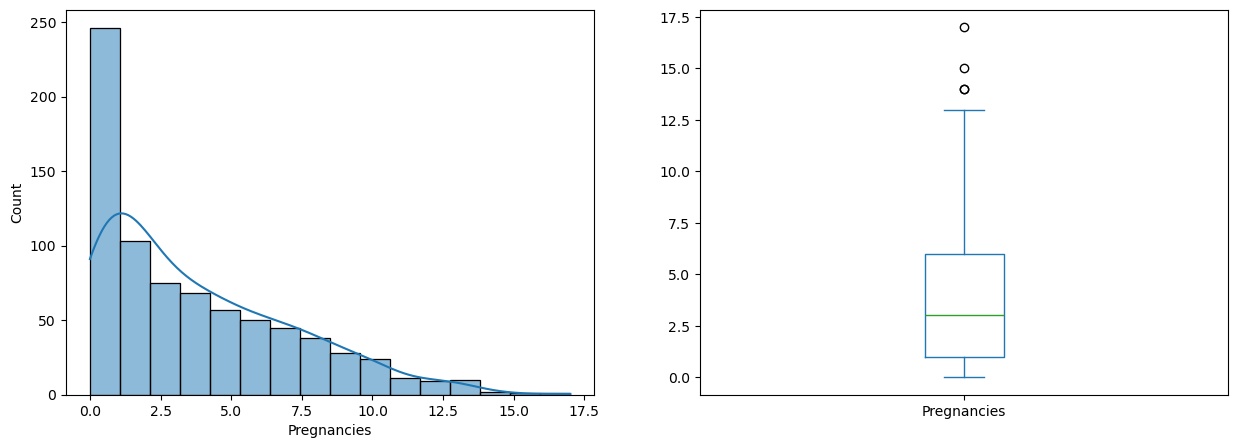

Lower Bound: -6.5
Upper Bound: 13.5
Outliers:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
88            15      136             70             32      110  37.1   
159           17      163             72             41      114  40.9   
298           14      100             78             25      184  36.6   
455           14      175             62             30        0  33.6   

     DiabetesPedigreeFunction  Age  Outcome  
88                      0.153   43        1  
159                     0.817   47        1  
298                     0.412   46        1  
455                     0.212   38        1  


In [18]:
plt.figure(2)
plt.subplot(121) #histogram
sns.histplot(data['Pregnancies'], kde = True)

plt.subplot(122) #box plot
box_plot = data['Pregnancies'].plot.box(figsize=(15, 5))
plt.show()

#outlier 
Q1 = data['Pregnancies'].quantile(0.25)
Q3 = data['Pregnancies'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = data[(data['Pregnancies'] < lower_bound) | (data['Pregnancies'] > upper_bound)]

# Print results
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Outliers:\n{outliers}")


Most datas are centered [0,2], and distribution is right-skewed (long tail to the right), meaning that the number of pregnancy occurs less frequency. The outlier is equal or greater than 13. So We use median value to fill in the outlier rows. 

### Glucose

Lower Bound: 39.0
Upper Bound: 201.0


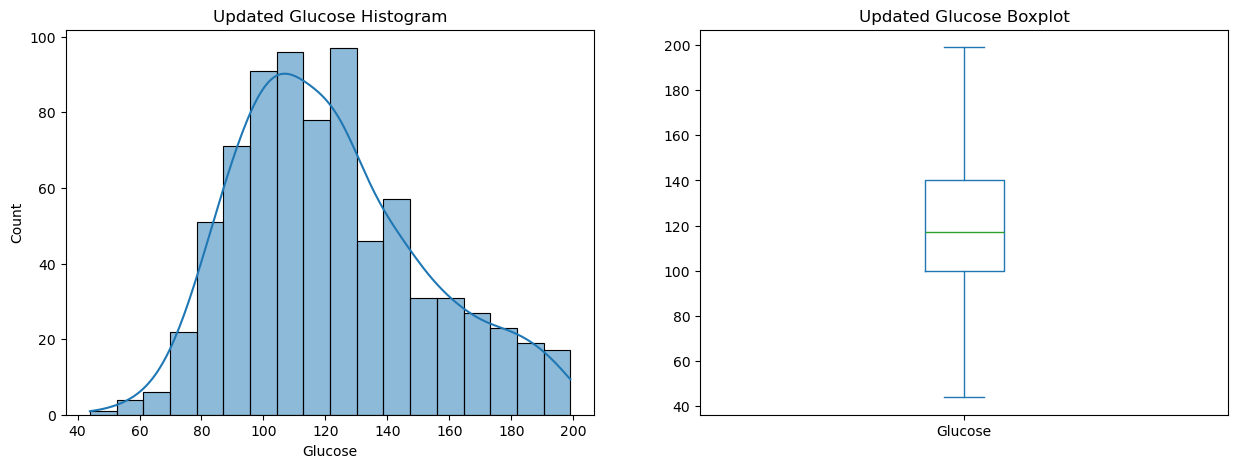

In [34]:
# Replace outliers in 'Glucose' with the mean value
# Define mean value
mean_glucose = 121.68

# Calculate Q1 and Q3
Q1 = data['Glucose'].quantile(0.25)
Q3 = data['Glucose'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print results
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Plot the updated histogram and boxplot
plt.figure(2)

# Histogram
plt.subplot(121)
sns.histplot(data['Glucose'], kde=True)
plt.title('Updated Glucose Histogram')

# Boxplot
plt.subplot(122)
data['Glucose'].plot.box(figsize=(15, 5))
plt.title('Updated Glucose Boxplot')

# Show the plots
plt.show()

Most people have glucose values between 80 and 150.
The data is right-skewed (long tail of high glucose values).
For missing value in this column, we fill it with mean value of Glucose because the distribution isn't skewed. 


### Blood pressure

Lower Bound: 40.0
Upper Bound: 104.0


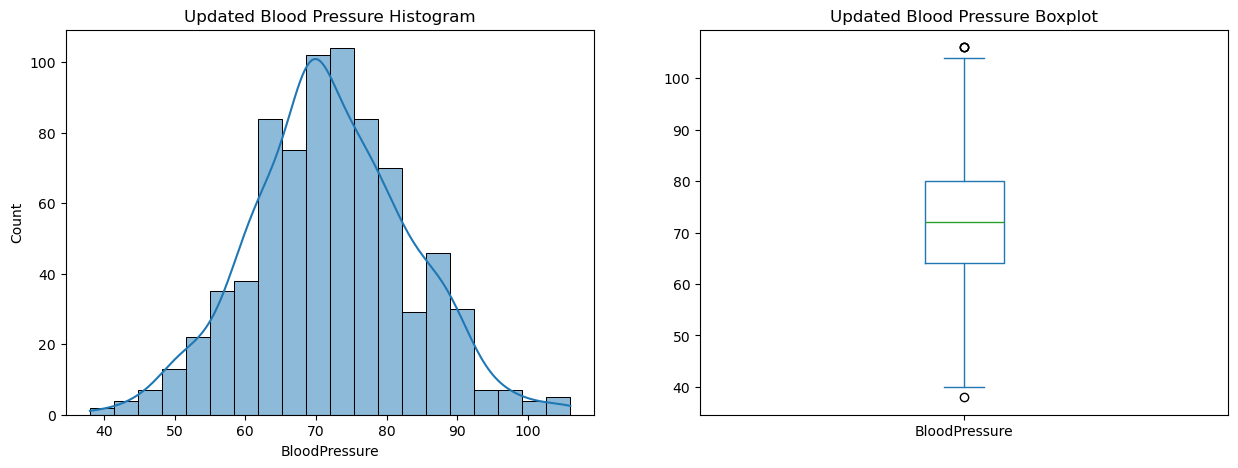

In [35]:
# Replace outliers in 'BloodPressure' with the mean value (69.1)
# Define mean and median values
mean_bp = 69.1
median_bp = 72  # Optional: Use this if you prefer median

# Calculate Q1 and Q3
Q1 = data['BloodPressure'].quantile(0.25)
Q3 = data['BloodPressure'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print results
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Plot the updated histogram and boxplot
plt.figure(2)

# Histogram
plt.subplot(121)
sns.histplot(data['BloodPressure'], kde=True)
plt.title('Updated Blood Pressure Histogram')

# Boxplot
plt.subplot(122)
data['BloodPressure'].plot.box(figsize=(15, 5))
plt.title('Updated Blood Pressure Boxplot')

# Show the plots
plt.show()

Most blood pressure values are concentrated between 60 and 90, which aligns with typical healthy ranges.Outliers above 100 indicate potential cases of elevated or hypertensive blood pressure.The overall distribution is fairly normal, apart from the abnomalies at 0.

### Skin thickness


Lower Bound: 1.0
Upper Bound: 57.0


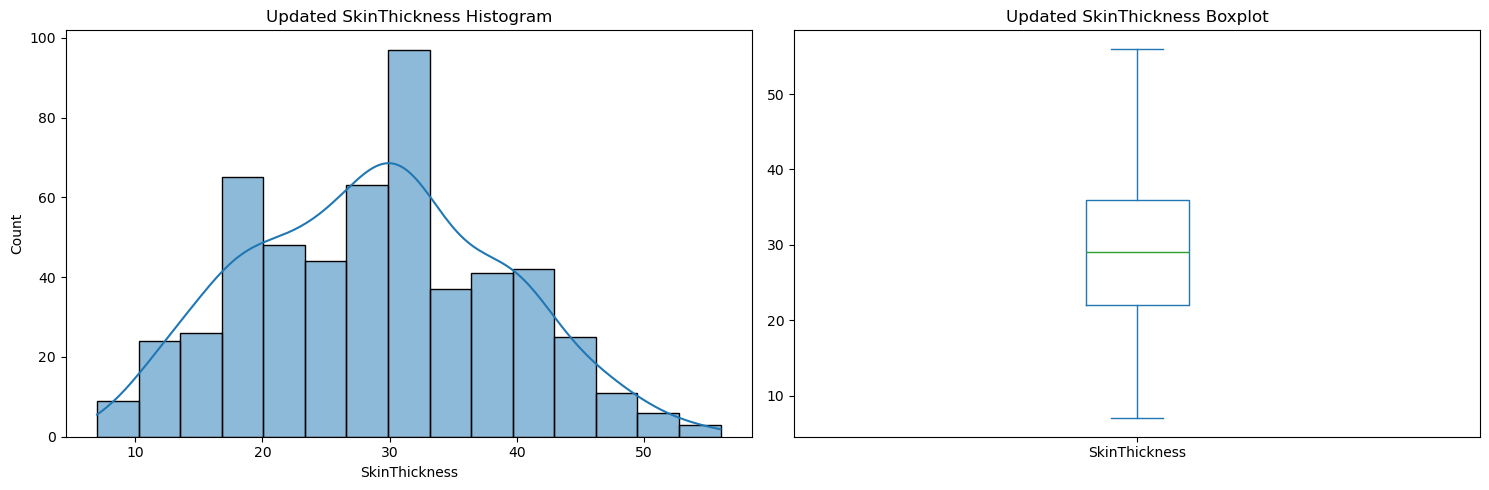

In [36]:
# Replace zeros and NaN to signify missing data
data['SkinThickness'] = data['SkinThickness'].replace(0, np.nan)

# Calculate Q1 and Q3 (ignoring NaN values)
Q1 = data['SkinThickness'].quantile(0.25)
Q3 = data['SkinThickness'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print results
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Plot the updated histogram and boxplot
plt.figure(figsize=(16, 6))

# Histogram
plt.subplot(121)
sns.histplot(data['SkinThickness'], kde=True)
plt.title('Updated SkinThickness Histogram')

# Boxplot
plt.subplot(122)
data['SkinThickness'].plot.box(figsize=(15, 5))
plt.title('Updated SkinThickness Boxplot')

# Show the plots
plt.tight_layout()
plt.show() 

# Check for the number of zeros in the SkinThickness column
#zero_count_skin_thickness = (data['SkinThickness'] == 0).sum()

# Display the result
#print(f"Number of zero values in SkinThickness column: {zero_count_skin_thickness}")

### Insulin

Lower Bound: -150.0
Upper Bound: 250.0


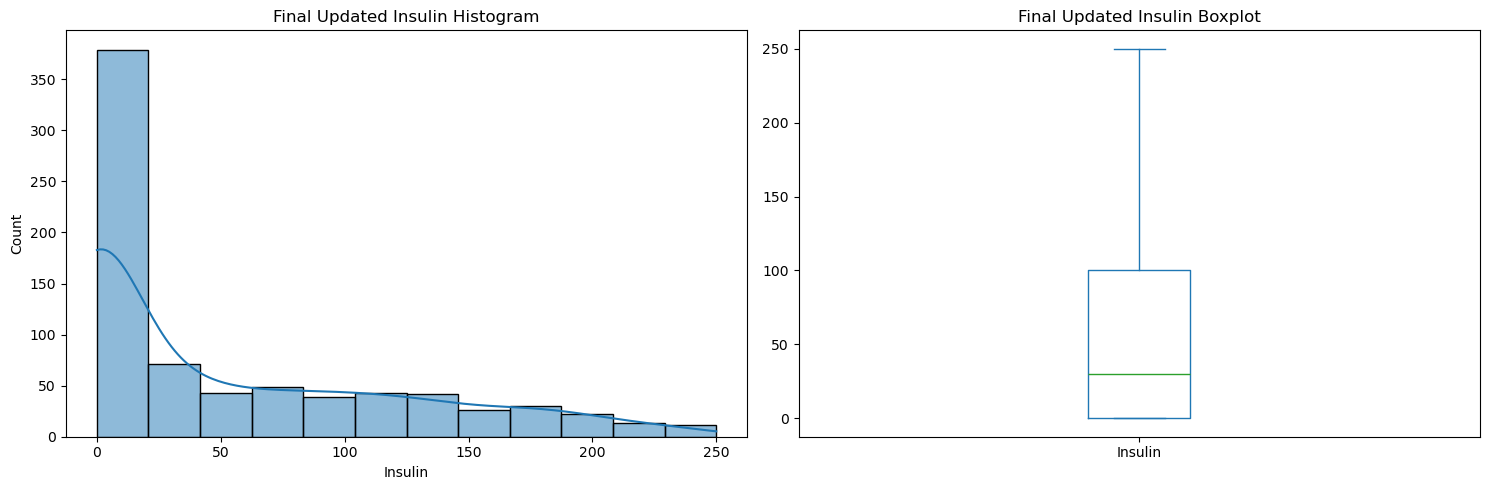

In [38]:
Q1 = data['Insulin'].quantile(0.25)
Q3 = data['Insulin'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Print results
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
    
# Histogram
plt.subplot(121)
sns.histplot(data['Insulin'], kde=True)
plt.title('Final Updated Insulin Histogram')

# Boxplot
plt.subplot(122)
data['Insulin'].plot.box(figsize=(15, 5))
plt.title('Final Updated Insulin Boxplot')

# Show plots
plt.tight_layout()
plt.show()

Most individuals have very low insulin values, but there are some unusually high values (outliers). The data is skewed, with a small group showing much larger insulin levels.

### BMI


Lower Bound: 14.300000000000004
Upper Bound: 49.49999999999999


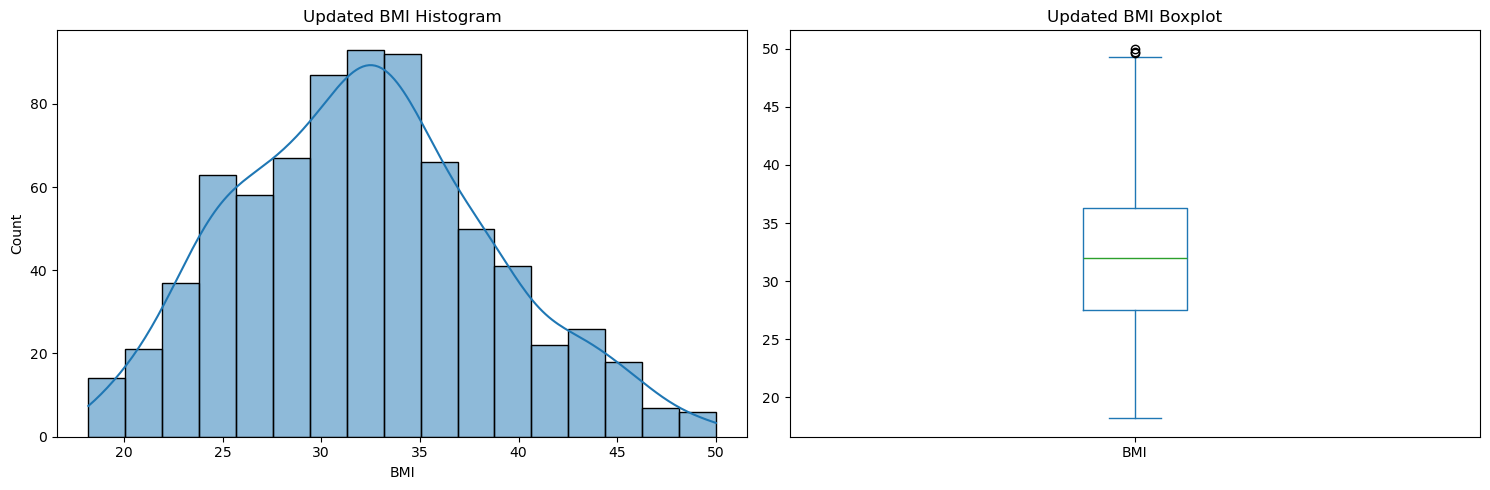

In [39]:
# Define mean and median values
mean_bmi = 31.99
median_bmi = 32

# Calculate Q1 and Q3
Q1 = data['BMI'].quantile(0.25)
Q3 = data['BMI'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Print results
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Plot the updated histogram and boxplot
plt.figure(figsize=(16, 6))

# Histogram
plt.subplot(121)
sns.histplot(data['BMI'], kde=True)
plt.title('Updated BMI Histogram')

# Boxplot
plt.subplot(122)
data['BMI'].plot.box(figsize=(15, 5))
plt.title('Updated BMI Boxplot')

# Show the plots
plt.tight_layout()
plt.show()

The BMI data has a roughly normal distribution with most values clustered around 30–35. There are a few extreme values (outliers) on both the low and high ends, which slightly skew the data.

### Diabetes Pedigree function

Lower Bound: -0.32999999999999996
Upper Bound: 1.2
Lower Bound: -0.2639999999999999
Upper Bound: 1.0899999999999999
Lower Bound: -0.22612500000000005
Upper Bound: 1.026875
Lower Bound: -0.21712500000000004
Upper Bound: 1.011875
Lower Bound: -0.21487500000000012
Upper Bound: 1.0081250000000002


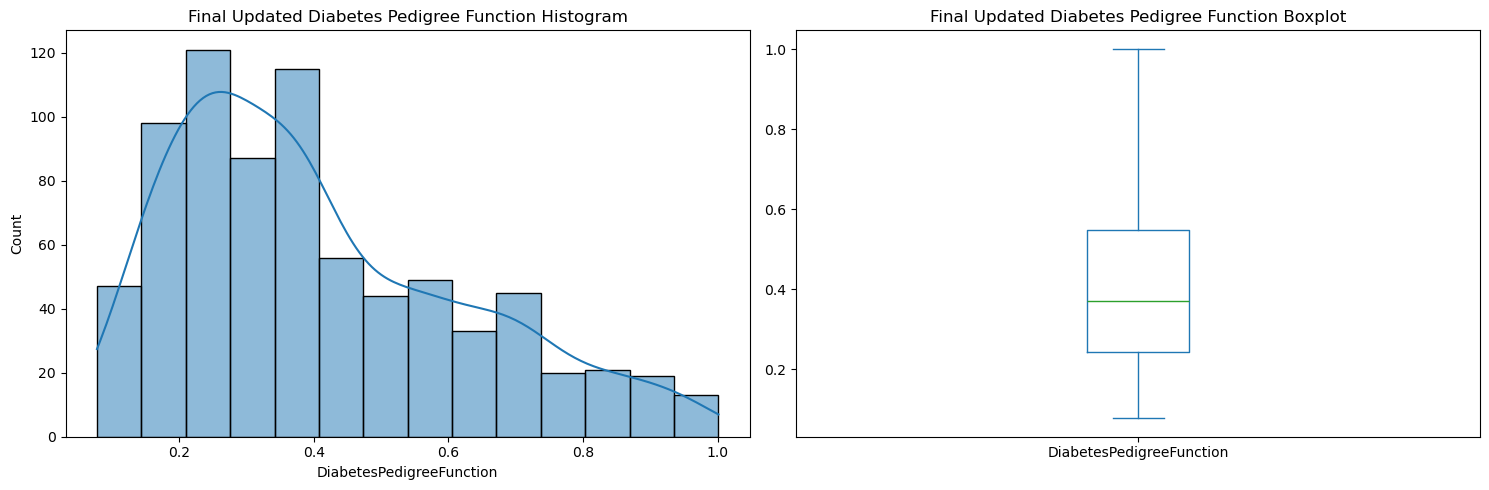

In [24]:
# Iteratively replace outliers in 'DiabetesPedigreeFunction' with the median
median_dpf = 0.372500  # Median value for DPF

# Perform iterative replacement
while True:
    Q1 = data['DiabetesPedigreeFunction'].quantile(0.25)
    Q3 = data['DiabetesPedigreeFunction'].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Print results
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")

    # Identify outliers
    outliers = data[(data['DiabetesPedigreeFunction'] < lower_bound) | 
                    (data['DiabetesPedigreeFunction'] > upper_bound)]

    if outliers.empty:  # Exit loop if no outliers remain
        break

    # Replace outliers with the median
    data.loc[(data['DiabetesPedigreeFunction'] < lower_bound) | 
             (data['DiabetesPedigreeFunction'] > upper_bound), 'DiabetesPedigreeFunction'] = median_dpf

# Save the updated dataset
data.to_csv('final_updated_dpf.csv', index=False)

# Plot the updated histogram and boxplot
plt.figure(figsize=(16, 6))

# Histogram
plt.subplot(121)
sns.histplot(data['DiabetesPedigreeFunction'], kde=True)
plt.title('Final Updated Diabetes Pedigree Function Histogram')

# Boxplot
plt.subplot(122)
data['DiabetesPedigreeFunction'].plot.box(figsize=(15, 5))
plt.title('Final Updated Diabetes Pedigree Function Boxplot')

# Show the plots
plt.tight_layout()
plt.show()

The DiabetesPedigreeFunction values are mostly small (close to 0), but there are some higher, unusual values (outliers) creating a right-skewed distribution.

### AGE

Lower Bound: -1.5
Upper Bound: 66.5
Lower Bound: 0.0
Upper Bound: 64.0
Lower Bound: 1.5
Upper Bound: 61.5
Lower Bound: 1.5
Upper Bound: 61.5


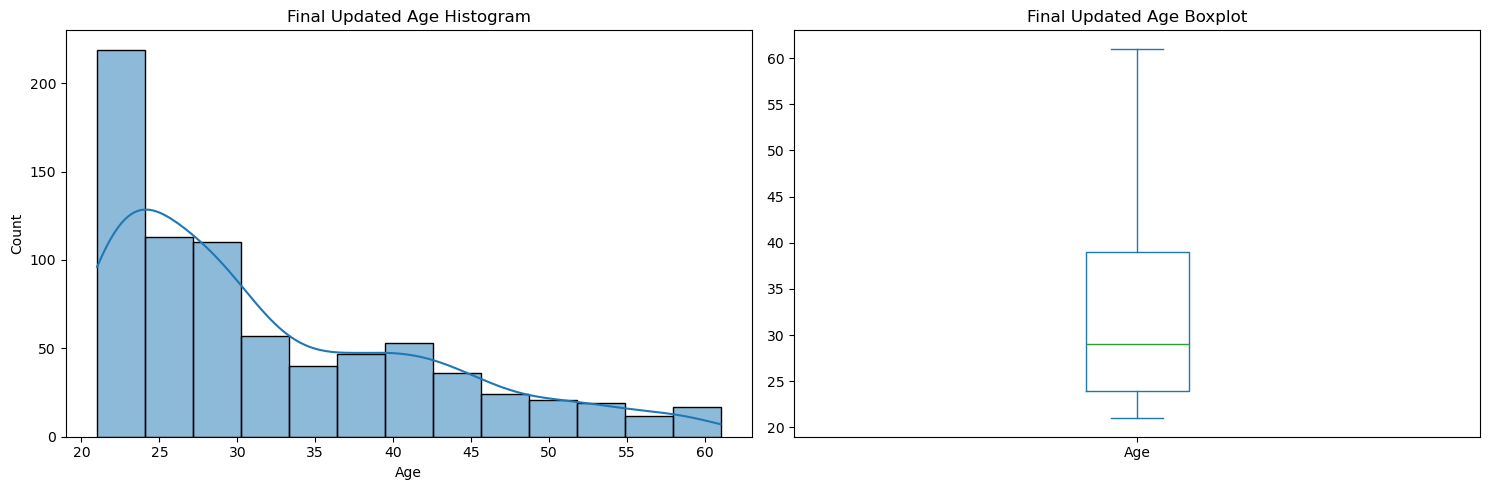

In [25]:
# Iteratively replace outliers in 'Age' with the median
median_age = 29  # Use the median value for Age

while True:
    Q1 = data['Age'].quantile(0.25)
    Q3 = data['Age'].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Print results
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")

    # Identify outliers
    outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]

    if outliers.empty:  # Exit the loop if no outliers remain
        break

    # Replace outliers with the median value
    data.loc[(data['Age'] < lower_bound) | (data['Age'] > upper_bound), 'Age'] = median_age

# Save the final updated dataset
data.to_csv('final_updated_age.csv', index=False)

# Plot the updated histogram and boxplot
plt.figure(figsize=(16, 6))

# Histogram
plt.subplot(121)
sns.histplot(data['Age'], kde=True)
plt.title('Final Updated Age Histogram')

# Boxplot
plt.subplot(122)
data['Age'].plot.box(figsize=(15, 5))
plt.title('Final Updated Age Boxplot')

# Show the plots
plt.tight_layout()
plt.show()

Most individuals are between 20 and 40 years old. The distribution is right-skewed, with a small number of older individuals (outliers) extending into their 70s and 80s. The median age is approximately 30.

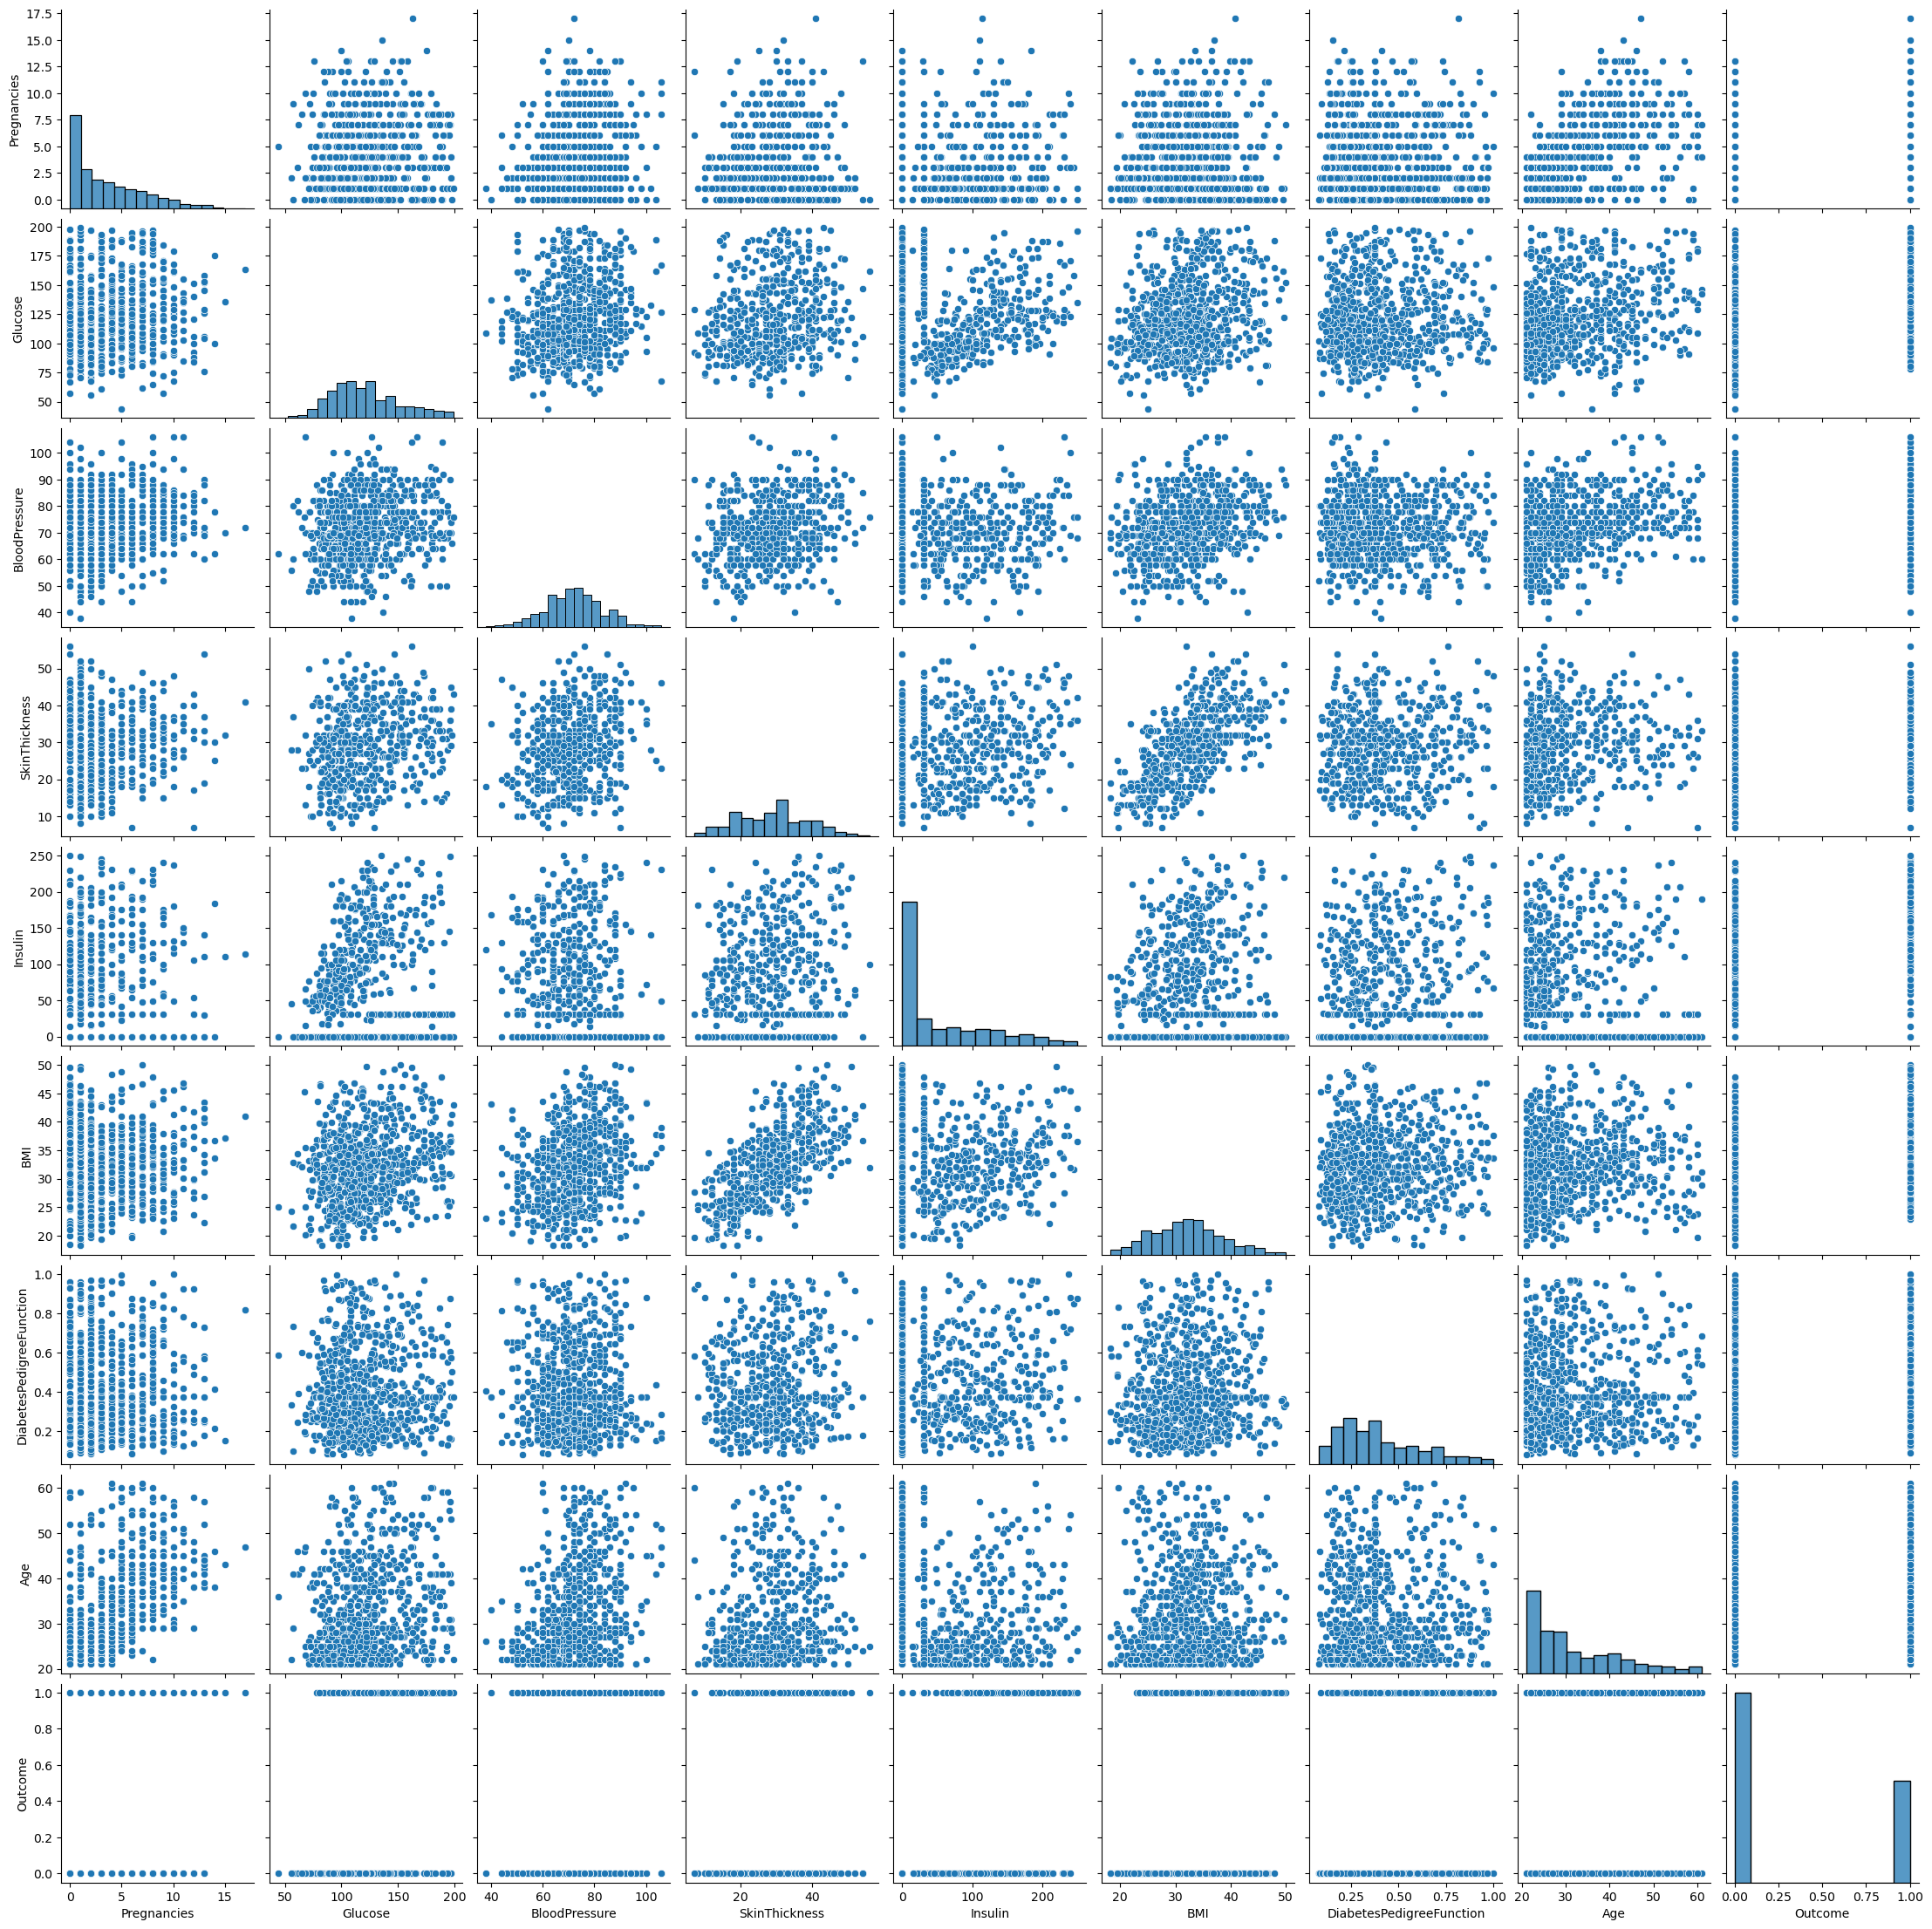

In [26]:
sns.pairplot(data)

# Generate Correlation for each variables


In [27]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127912,0.200308,0.125591,-0.102464,0.042267,-0.010327,0.598810,0.221898
Glucose,0.127912,1.000000,0.204706,0.201397,0.103732,0.228373,0.053403,0.254683,0.492928
BloodPressure,0.200308,0.204706,1.000000,0.242379,-0.049442,0.270113,-0.019138,0.332474,0.160763
SkinThickness,0.125591,0.201397,0.242379,1.000000,0.114849,0.653729,0.050907,0.159277,0.252824
Insulin,-0.102464,0.103732,-0.049442,0.114849,1.000000,0.136722,0.217722,-0.052582,0.064235
BMI,0.042267,0.228373,0.270113,0.653729,0.136722,1.000000,0.085038,0.109571,0.300609
DiabetesPedigreeFunction,-0.010327,0.053403,-0.019138,0.050907,0.217722,0.085038,1.000000,0.017511,0.136351
Age,0.598810,0.254683,0.332474,0.159277,-0.052582,0.109571,0.017511,1.000000,0.306438
Outcome,0.221898,0.492928,0.160763,0.252824,0.064235,0.300609,0.136351,0.306438,1.000000


In [28]:
corr_matrix = data.corr()

# Visualizing the Correlation

<Axes: >

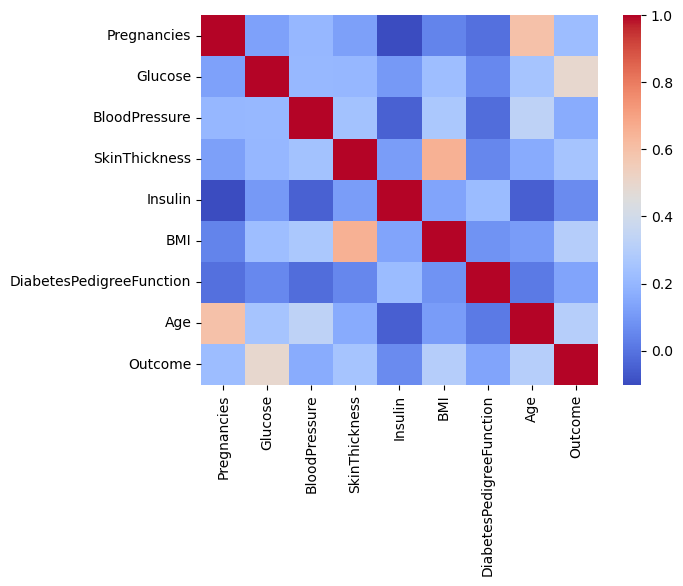

In [29]:
sns.heatmap(corr_matrix, cmap="coolwarm")

# Check how target variable is different for each column of diabetic and non-diabetic patients

In [30]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.710080,70.712800,27.150009,50.531000,30.788780,0.385766,29.772
1,4.865672,142.165522,74.477985,32.423927,59.658582,34.829179,0.447552,36.250


Key Insights:
	•	Glucose, BMI, and Insulin are significantly higher in diabetic patients, suggesting these factors play an important role in diabetes.
	•	Age and Pregnancies are also higher for diabetic patients.
	•	Overall, diabetic patients have higher values across most features compared to non-diabetic patients.

### Creating X & Y variables for graph

In [31]:
X = data.drop(columns = 'Outcome', axis = 1)
Y = data['Outcome']

# Splitting data into 70%-30% for training and testing model    ---test

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

# Running Classification models

### 1. Logistic Regression 